In [1]:
from architector import (build_complex, 
                         view_structures, 
                         convert_io_molecule)
import pandas as pd
import numpy as np
import mendeleev
import architector.io_ptable as io_ptable

In [2]:
# Set seed
np.random.seed(42)

In [3]:
metal_df = pd.read_pickle('metal_sample_dataframe.pkl')
# ligands_df = pd.read_pickle('v1_ligand_sampling_df.pkl')
ligands_df = pd.read_pickle('fixed_full_ligand_sample.pkl')

In [4]:
metal_df

,metal,ox,coreCNs,coreCN_counts_CSD
0,La,3,"[9, 8, 10, 6, 7, 5, 11, 4, 12]","[121, 75, 43, 39, 39, 14, 5, 5, 1]"
1,Ce,3,"[9, 8, 7, 6, 10, 4, 5]","[64, 52, 30, 28, 15, 6, 5]"
2,Ce,4,"[8, 9, 6, 7, 10, 4, 5]","[108, 69, 46, 35, 16, 9, 7]"
3,Pr,3,"[9, 8, 7, 6, 10, 5, 12, 4, 11]","[70, 33, 16, 14, 8, 2, 1, 1, 1]"
4,Nd,3,"[9, 8, 7, 6, 10, 5, 4, 12]","[122, 81, 64, 46, 16, 11, 7, 2]"
...,...,...,...,...
86,Pt,4,"[6, 4, 5]","[1041, 72, 11]"
87,Au,1,"[4, 2, 3, 5]","[83, 32, 3, 1]"
88,Au,3,"[4, 5, 2, 6]","[1096, 26, 3, 2]"
89,Hg,1,"[4, 5, 6, 8, 7, 3, 2]","[650, 170, 96, 24, 20, 12, 11]"


In [5]:
# If still necessary, we can filter out the lanthanides for now, or later.
io_ptable.lanthanides

['La',
 'Ce',
 'Pr',
 'Nd',
 'Pm',
 'Sm',
 'Eu',
 'Gd',
 'Tb',
 'Dy',
 'Ho',
 'Er',
 'Tm',
 'Yb',
 'Lu']

In [6]:
all_fracts = []
for i,row in metal_df.iterrows():
    fracts = np.array(row['coreCN_counts_CSD'])
    out_fracts = fracts / fracts.sum()
    all_fracts.append(np.round(out_fracts,3))
metal_df['coreCN_fracts'] = all_fracts

In [7]:
metal_df

,metal,ox,coreCNs,coreCN_counts_CSD,coreCN_fracts
0,La,3,"[9, 8, 10, 6, 7, 5, 11, 4, 12]","[121, 75, 43, 39, 39, 14, 5, 5, 1]","[0.354, 0.219, 0.126, 0.114, 0.114, 0.041, 0.0..."
1,Ce,3,"[9, 8, 7, 6, 10, 4, 5]","[64, 52, 30, 28, 15, 6, 5]","[0.32, 0.26, 0.15, 0.14, 0.075, 0.03, 0.025]"
2,Ce,4,"[8, 9, 6, 7, 10, 4, 5]","[108, 69, 46, 35, 16, 9, 7]","[0.372, 0.238, 0.159, 0.121, 0.055, 0.031, 0.024]"
3,Pr,3,"[9, 8, 7, 6, 10, 5, 12, 4, 11]","[70, 33, 16, 14, 8, 2, 1, 1, 1]","[0.479, 0.226, 0.11, 0.096, 0.055, 0.014, 0.00..."
4,Nd,3,"[9, 8, 7, 6, 10, 5, 4, 12]","[122, 81, 64, 46, 16, 11, 7, 2]","[0.35, 0.232, 0.183, 0.132, 0.046, 0.032, 0.02..."
...,...,...,...,...,...
86,Pt,4,"[6, 4, 5]","[1041, 72, 11]","[0.926, 0.064, 0.01]"
87,Au,1,"[4, 2, 3, 5]","[83, 32, 3, 1]","[0.697, 0.269, 0.025, 0.008]"
88,Au,3,"[4, 5, 2, 6]","[1096, 26, 3, 2]","[0.972, 0.023, 0.003, 0.002]"
89,Hg,1,"[4, 5, 6, 8, 7, 3, 2]","[650, 170, 96, 24, 20, 12, 11]","[0.661, 0.173, 0.098, 0.024, 0.02, 0.012, 0.011]"


In [8]:
# Get rid of CNs found in less than 1 % of cases in CSD # -> Added
newrows = []
for i,row in metal_df.iterrows():
    newrow = row.copy()
    if row['coreCN_fracts'].shape[0] > 0:
        save_cn_inds = np.where(row['coreCN_fracts'] > 0.01)[0]
        newrow['coreCNs'] = np.array(row['coreCNs'])[save_cn_inds]
        newrow['coreCN_counts_CSD'] = np.array(row['coreCN_counts_CSD'])[save_cn_inds]
        newrow['coreCN_fracts'] = np.array(row['coreCN_fracts'])[save_cn_inds]
        newrow['total_count'] = np.sum(newrow['coreCN_counts_CSD'])
        newrows.append(newrow)
subset_cn_metal_df = pd.DataFrame(newrows)

In [9]:
for i,row in subset_cn_metal_df.iterrows():
    print(row)

metal                                                               La
ox                                                                   3
coreCNs                                     [9, 8, 10, 6, 7, 5, 11, 4]
coreCN_counts_CSD                      [121, 75, 43, 39, 39, 14, 5, 5]
coreCN_fracts        [0.354, 0.219, 0.126, 0.114, 0.114, 0.041, 0.0...
total_count                                                        341
Name: 0, dtype: object
metal                                                          Ce
ox                                                              3
coreCNs                                    [9, 8, 7, 6, 10, 4, 5]
coreCN_counts_CSD                      [64, 52, 30, 28, 15, 6, 5]
coreCN_fracts        [0.32, 0.26, 0.15, 0.14, 0.075, 0.03, 0.025]
total_count                                                   200
Name: 1, dtype: object
metal                                                               Ce
ox                                                           

In [10]:
subset_cn_metal_df[subset_cn_metal_df.metal == 'Pd']

,metal,ox,coreCNs,coreCN_counts_CSD,coreCN_fracts,total_count
71,Pd,0,"[4, 5]","[9899, 125]","[0.978, 0.012]",10024
72,Pd,2,"[4, 5]","[9741, 119]","[0.987, 0.012]",9860
73,Pd,4,"[4, 6, 5]","[98, 77, 3]","[0.547, 0.43, 0.017]",178


In [11]:
gen_metal_df = subset_cn_metal_df

In [12]:
gen_metal_df.reset_index(drop=True, inplace=True)

In [13]:
gen_metal_df

,metal,ox,coreCNs,coreCN_counts_CSD,coreCN_fracts,total_count
0,La,3,"[9, 8, 10, 6, 7, 5, 11, 4]","[121, 75, 43, 39, 39, 14, 5, 5]","[0.354, 0.219, 0.126, 0.114, 0.114, 0.041, 0.0...",341
1,Ce,3,"[9, 8, 7, 6, 10, 4, 5]","[64, 52, 30, 28, 15, 6, 5]","[0.32, 0.26, 0.15, 0.14, 0.075, 0.03, 0.025]",200
2,Ce,4,"[8, 9, 6, 7, 10, 4, 5]","[108, 69, 46, 35, 16, 9, 7]","[0.372, 0.238, 0.159, 0.121, 0.055, 0.031, 0.024]",290
3,Pr,3,"[9, 8, 7, 6, 10, 5]","[70, 33, 16, 14, 8, 2]","[0.479, 0.226, 0.11, 0.096, 0.055, 0.014]",143
4,Nd,3,"[9, 8, 7, 6, 10, 5, 4]","[122, 81, 64, 46, 16, 11, 7]","[0.35, 0.232, 0.183, 0.132, 0.046, 0.032, 0.02]",347
...,...,...,...,...,...,...
85,Pt,4,"[6, 4]","[1041, 72]","[0.926, 0.064]",1113
86,Au,1,"[4, 2, 3]","[83, 32, 3]","[0.697, 0.269, 0.025]",118
87,Au,3,"[4, 5]","[1096, 26]","[0.972, 0.023]",1122
88,Hg,1,"[4, 5, 6, 8, 7, 3, 2]","[650, 170, 96, 24, 20, 12, 11]","[0.661, 0.173, 0.098, 0.024, 0.02, 0.012, 0.011]",983


In [14]:
# Make sure that Pm is included.
print('Pm' in gen_metal_df.metal)
print('Pm' in io_ptable.limited_all_metals)

False
True


In [15]:
gen_metal_df.iloc[0]

metal                                                               La
ox                                                                   3
coreCNs                                     [9, 8, 10, 6, 7, 5, 11, 4]
coreCN_counts_CSD                      [121, 75, 43, 39, 39, 14, 5, 5]
coreCN_fracts        [0.354, 0.219, 0.126, 0.114, 0.114, 0.041, 0.0...
total_count                                                        341
Name: 0, dtype: object

In [16]:
refrow = gen_metal_df[gen_metal_df.metal == 'Sm'].iloc[0] # Add Pm with Sm numbers (neighbors of Sm and Nd) - both Sm and Nd have similar values anyway.
gen_metal_df.loc[90] = {'metal':'Pm',
                        'ox':3,
                        'coreCNs':refrow['coreCNs'],
                        'coreCN_counts_CSD':refrow['coreCN_counts_CSD'],
                        'coreCN_fracts':refrow['coreCN_fracts'],
                        'total_count':refrow['total_count']
                        }

In [17]:
gen_metal_df # Notice that Pm is now included

,metal,ox,coreCNs,coreCN_counts_CSD,coreCN_fracts,total_count
0,La,3,"[9, 8, 10, 6, 7, 5, 11, 4]","[121, 75, 43, 39, 39, 14, 5, 5]","[0.354, 0.219, 0.126, 0.114, 0.114, 0.041, 0.0...",341
1,Ce,3,"[9, 8, 7, 6, 10, 4, 5]","[64, 52, 30, 28, 15, 6, 5]","[0.32, 0.26, 0.15, 0.14, 0.075, 0.03, 0.025]",200
2,Ce,4,"[8, 9, 6, 7, 10, 4, 5]","[108, 69, 46, 35, 16, 9, 7]","[0.372, 0.238, 0.159, 0.121, 0.055, 0.031, 0.024]",290
3,Pr,3,"[9, 8, 7, 6, 10, 5]","[70, 33, 16, 14, 8, 2]","[0.479, 0.226, 0.11, 0.096, 0.055, 0.014]",143
4,Nd,3,"[9, 8, 7, 6, 10, 5, 4]","[122, 81, 64, 46, 16, 11, 7]","[0.35, 0.232, 0.183, 0.132, 0.046, 0.032, 0.02]",347
...,...,...,...,...,...,...
86,Au,1,"[4, 2, 3]","[83, 32, 3]","[0.697, 0.269, 0.025]",118
87,Au,3,"[4, 5]","[1096, 26]","[0.972, 0.023]",1122
88,Hg,1,"[4, 5, 6, 8, 7, 3, 2]","[650, 170, 96, 24, 20, 12, 11]","[0.661, 0.173, 0.098, 0.024, 0.02, 0.012, 0.011]",983
89,Hg,2,"[4, 5, 6, 8, 7, 3, 2]","[650, 170, 96, 24, 20, 12, 11]","[0.661, 0.173, 0.098, 0.024, 0.02, 0.012, 0.011]",983


In [18]:
max_n_atoms  = 250

def sample(metal_df,ligands_df,test=False,maxCN=12):
    """sample samples forom the metal dataframe first, then the ligands dataframe

    It assumes a flat probability across all metal/ligand combinations. 

    We could implement a frqeuency bias filter.

    Parameters
    ----------
    metal_df : pd.DataFrame
        Metals dataframe to sample from.
    ligands_df : pd.DataFrame
        Ligands dataframe to sample from.
    test : bool, optional 
        Whether to generate test dataframe (faster for Architector)
    maxCN : int, optional
        Maximum coordination number to sample.

    Returns
    -------
    sample_row : dict
        A row with as much metadata as needed to backtrace how this chemistry was sampled
    uid : str
        Unique identifier for the chemistry sampled
    """
    metal_row = metal_df.sample(1).iloc[0]
    if len(metal_row['coreCNs']) > 0: # Ensure there's at least 1 coreCN in list
        cn = np.random.choice(metal_row['coreCNs'],size=1)[0]
    else: # If not, try from 5-11.
        cn = np.random.choice(np.arange(5,12,1),size=1)[0]
    if cn > maxCN:
        cn = np.random.choice(np.arange(2,maxCN+1,1),size=1)[0]
    coordsites_left = cn
    natoms_total = 1
    complex_charge = metal_row['ox']
    ox =  metal_row['ox']
    metal = metal_row['metal']
    spin = mendeleev.__dict__[metal].ec.ionize(ox).unpaired_electrons() # Use mendeleev to assign spin (assigns highest possible in all cases I've seen)
    uid='{}_ox{}_cn{}_'.format(metal,ox,cn)
    architector_input = {'core':{'metal':metal,'coreCN':int(cn)},
                         'ligands':[],
                         'parameters':{'metal_ox':ox,
                                       'metal_spin':spin,
                                       'assemble_method':'GFN2-xTB',
                                       'full_method':'GFN2-xTB',
                                       'n_conformers':3, # Will return relaxed 3 lowest-energy XTB conformers per symmetry if distinct enough.
                                       'n_symmetries':10
                                       }}
    if test:
        architector_input['parameters'].update({'assemble_method':'UFF',
                                                'full_method':'UFF',
                                                'n_conformers':1})
    liguids = []
    lig_dents = []
    lig_charges = []
    lig_coord_atom_types = []
    lig_frequencies = []
    lig_natoms = []
    finished = False
    while not finished:
        tdf = ligands_df[ 
            ((ligands_df.charge + complex_charge) > -3) & # Filter 1 -> Charge > -3
            ((ligands_df.charge + complex_charge) < 5) & # Filter 2 -> Charge < 5
            (ligands_df.natoms + natoms_total < max_n_atoms) & # Filter 3 -> Max number of atoms (set at 250 now.)
            (coordsites_left - ligands_df.denticity >= 0) # Can fit at the metal surface with remaining coordination sites.
                        ]
        if tdf.shape[0] > 0: # Check that there's any ligands that match the constraints
            add_row = tdf.sample(1, weights=tdf.denticity).iloc[0] # Sample from the ligands
            # Weighting by denticity makes this equal likelihood PER coordination site.
            lig_dict = {'smiles':add_row['smiles'],'coordList':add_row['coordList']}
            architector_input['ligands'] = architector_input['ligands'] + [lig_dict]
            coordsites_left = coordsites_left - add_row['denticity']
            complex_charge = complex_charge + add_row['charge']
            natoms_total = natoms_total + add_row['natoms']
            lig_dents.append(add_row['denticity'])
            liguids.append(add_row['uid'])
            lig_charges.append(add_row['charge'])
            lig_frequencies.append(add_row['frequency'])
            lig_natoms.append(add_row['natoms'])
            lig_coord_atom_types.append(add_row['coord_atom_types'])
            if coordsites_left == 0: # Only finish when coordination environment filled.
                finished = True
        else:
            finished = True
    liguids_order = np.argsort(liguids) #Ensure the ligands are sorted for uid for checking for duplication.
    liguids = np.array(liguids)[liguids_order] #
    lig_dents = np.array(lig_dents)[liguids_order] #
    lig_charges = np.array(lig_charges)[liguids_order] #
    lig_frequencies = np.array(lig_frequencies)[liguids_order] #
    lig_natoms = np.array(lig_natoms)[liguids_order] #
    lig_coord_atom_types = np.array(lig_coord_atom_types)[liguids_order] #
    uid = uid + '_'.join(liguids)
    sample_row = {'label':uid,
                  'total_charge':complex_charge,
                  'n_atoms_total':natoms_total,
                  'metal_coordination_number':cn,
                  'metal_ox':ox,
                  'metal':metal,
                  'ligands':liguids,
                  'lig_denticities':lig_dents,
                  'lig_charges':lig_charges,
                  'lig_frequencies':lig_frequencies,
                  'lig_natoms':lig_natoms,
                  'lig_coord_atom_types':lig_coord_atom_types,
                  'architector_input':architector_input,
                  } # Save the sample and uid
    return sample_row, uid



def create_sample(metal_df,ligands_df,history_uids=None,nsamples=100,test=False,maxCN=12):
    """_summary_

    Parameters
    ----------
    metal_df : pd.DataFrame
        Metals dataframe to sample from.
    ligands_df : pd.DataFrame
        Ligands dataframe to sample from.
    history_uids : list, optional
        List of chemistries already sampled to avoid, by default None
    nsamples : int, optional
        Number fo samples to create in this pass, by default 100
    test : bool, optional
        Use faster parameters for architector

    Returns
    -------
    dfout : pd.DataFrame
        Sample chemistries with architector_input to pass to generation script.
    history_uids : list
        The UIDS of the chemistries sampled up to this point by the sampler routine.
    """
    if history_uids is None:
        history_uids = []
    total = 0
    out_rows = []
    while total < nsamples:
        sample_row,uid = sample(metal_df=metal_df,
                                ligands_df=ligands_df,
                                test=test,maxCN=maxCN)
        if uid not in history_uids:
            total += 1
            history_uids.append(uid)
            out_rows.append(sample_row)
    dfout = pd.DataFrame(out_rows)
    return dfout, history_uids

In [19]:
# Took 10 minutes to generate samples of chemistry
sdf,history = create_sample(
    metal_df=gen_metal_df,
    ligands_df=ligands_df,
    test=False,
    nsamples=1e5, # 100,000 samples
    )

In [20]:
sdf.to_pickle('meta_production_sample.pkl')

In [21]:
sdf

,label,total_charge,n_atoms_total,metal_coordination_number,metal_ox,metal,ligands,lig_denticities,lig_charges,lig_frequencies,lig_natoms,lig_coord_atom_types,architector_input
0,V_ox2_cn6_CC(C)OP(=O)(CP(=O)(OC(C)C)OC(C)C)OC(...,-1,125,6,2,V,"[CC(C)OP(=O)(CP(=O)(OC(C)C)OC(C)C)OC(C)C5,8, C...","[2, 1, 1, 1, 1]","[0, 0, -1, -1, -1]","[74, 2, 11, 28, 27]","[51, 21, 21, 16, 15]","[O.2,O.2, Se, Te, O.co2, N.am]","{'core': {'metal': 'V', 'coreCN': 6}, 'ligands..."
1,"Mn_ox4_cn4_NNC(=O)[O-]0,4_[Se-][Se][Se][Se-]0,3",1,13,4,4,Mn,"[NNC(=O)[O-]0,4, [Se-][Se][Se][Se-]0,3]","[2, 2]","[-1, -2]","[22, 49]","[8, 4]","[N.3,O.co2, Se,Se]","{'core': {'metal': 'Mn', 'coreCN': 4}, 'ligand..."
2,Tb_ox3_cn10_CC(C)P(C(C)C)C(C)C3_CNC(N)=S4_C[Si...,0,240,10,3,Tb,"[CC(C)P(C(C)C)C(C)C3, CNC(N)=S4, C[Si](C)(C)[S...","[1, 1, 1, 2, 1, 4]","[0, 0, -1, -1, 0, -1]","[202, 21, 77, 33, 11, 17]","[31, 11, 40, 27, 30, 100]","[P.3, S.2, Si, N.ar,N.pl3, O.2, P.3,Si,P.3,P.3]","{'core': {'metal': 'Tb', 'coreCN': 10}, 'ligan..."
3,Pd_ox0_cn5_CC(C)(C)P(CN1[B-]N(CP(C(C)(C)C)C(C)...,-2,97,5,0,Pd,[CC(C)(C)P(CN1[B-]N(CP(C(C)(C)C)C(C)(C)C)c2ccc...,"[3, 2]","[-1, -1]","[16, 39]","[73, 23]","[P.3,B,P.3, N.2,C.2]","{'core': {'metal': 'Pd', 'coreCN': 5}, 'ligand..."
4,Hf_ox4_cn8_Brc1ccc(cc1)C(=O)[O-]9_C1COCCOCCOCC...,2,73,8,4,Hf,"[Brc1ccc(cc1)C(=O)[O-]9, C1COCCOCCOCCO12,5,8,1...","[1, 4, 3]","[-1, 0, -1]","[30, 133, 14]","[14, 28, 30]","[O.co2, O.3,O.3,O.3,O.3, O.co2,N.2,N.ar]","{'core': {'metal': 'Hf', 'coreCN': 8}, 'ligand..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,"Tb_ox3_cn4_COC(=O)NN3,5_O=S(=O)([N-]c1cccc2ccc...",2,44,4,3,Tb,"[COC(=O)NN3,5, O=S(=O)([N-]c1cccc2cccnc12)c1cc...","[2, 2]","[0, -1]","[41, 11]","[12, 31]","[O.2,N.3, N.pl3,N.ar]","{'core': {'metal': 'Tb', 'coreCN': 4}, 'ligand..."
99996,Ru_ox4_cn6_C(CC[Sb](c1ccccc1)c1ccccc1)[Sb](c1c...,2,148,6,4,Ru,[C(CC[Sb](c1ccccc1)c1ccccc1)[Sb](c1ccccc1)c1cc...,"[2, 4]","[0, -2]","[4, 17]","[55, 92]","[Sb,Sb, N.2,N.2,N.ar,N.ar]","{'core': {'metal': 'Ru', 'coreCN': 6}, 'ligand..."
99997,Ce_ox3_cn4_Cc1cc(C)c([Te-])c(C)c16_NCC(=O)[N-]...,0,37,4,3,Ce,"[Cc1cc(C)c([Te-])c(C)c16, NCC(=O)[N-]CC(=O)[O-...","[1, 3]","[-1, -2]","[11, 27]","[21, 15]","[Te, N.3,N.am,O.co2]","{'core': {'metal': 'Ce', 'coreCN': 4}, 'ligand..."
99998,K_ox1_cn3_C[Ge](C)(C)[CH-2]4_O=S1(=O)N=C([S-])...,-2,43,3,1,K,"[C[Ge](C)(C)[CH-2]4, O=S1(=O)N=C([S-])c2ccccc1...","[1, 1, 1]","[-2, -1, 0]","[2, 32, 16]","[15, 16, 11]","[C.3, S.3, S.2]","{'core': {'metal': 'K', 'coreCN': 3}, 'ligands..."


<Axes: >

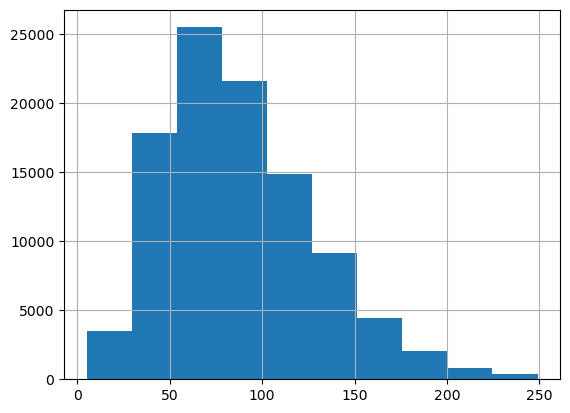

In [22]:
sdf.n_atoms_total.hist()

<Axes: >

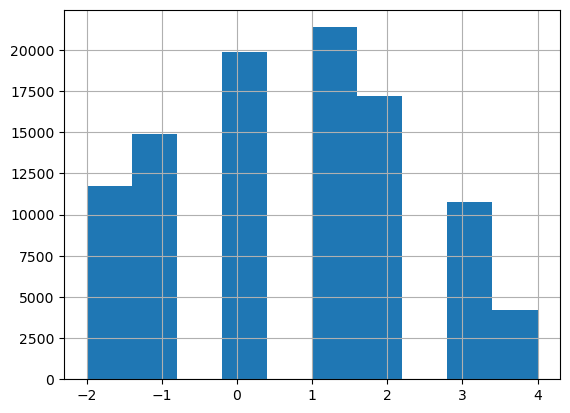

In [23]:
sdf.total_charge.hist()

In [24]:
sdf.metal.value_counts()

metal
Mn    5375
V     4329
Ti    3396
Pd    3319
Cr    3203
      ... 
Li    1069
Tm    1066
Sc    1061
Ag    1049
Er    1043
Name: count, Length: 61, dtype: int64

<Axes: >

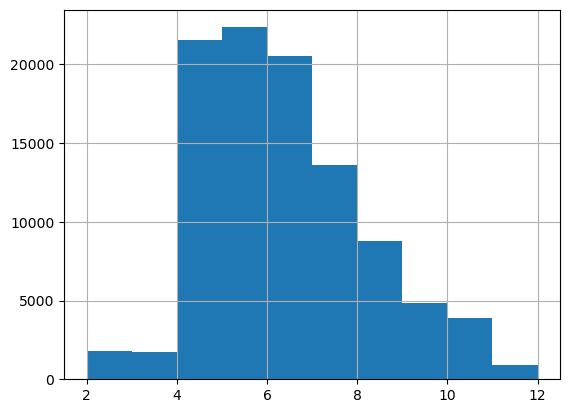

In [25]:
sdf.metal_coordination_number.hist()

<Axes: >

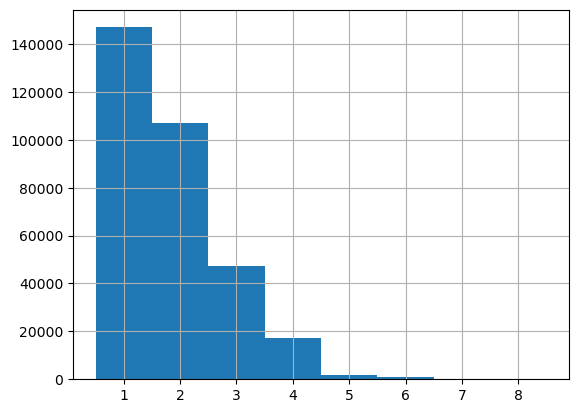

In [26]:
dents = []
for i,row in sdf.iterrows():
    dents += row['lig_denticities'].tolist()
dents = pd.Series(dents)
dents.hist(bins=np.arange(1,10,1),align='left')

In [27]:
ligs= []
for i,row in sdf.iterrows():
    ligs += [row['metal'] + x for x in row['ligands'].tolist()]
    ligs += row['ligands'].tolist()
ligs = pd.Series(ligs)

In [28]:
un,counts = np.unique(ligs,return_counts=True)

In [29]:
print(len(un))
print(min(counts))

44443
1


In [30]:
len(np.where(counts == 1)[0])

1167

In [31]:
sdf.iloc[0:10]

,label,total_charge,n_atoms_total,metal_coordination_number,metal_ox,metal,ligands,lig_denticities,lig_charges,lig_frequencies,lig_natoms,lig_coord_atom_types,architector_input
0,V_ox2_cn6_CC(C)OP(=O)(CP(=O)(OC(C)C)OC(C)C)OC(...,-1,125,6,2,V,"[CC(C)OP(=O)(CP(=O)(OC(C)C)OC(C)C)OC(C)C5,8, C...","[2, 1, 1, 1, 1]","[0, 0, -1, -1, -1]","[74, 2, 11, 28, 27]","[51, 21, 21, 16, 15]","[O.2,O.2, Se, Te, O.co2, N.am]","{'core': {'metal': 'V', 'coreCN': 6}, 'ligands..."
1,"Mn_ox4_cn4_NNC(=O)[O-]0,4_[Se-][Se][Se][Se-]0,3",1,13,4,4,Mn,"[NNC(=O)[O-]0,4, [Se-][Se][Se][Se-]0,3]","[2, 2]","[-1, -2]","[22, 49]","[8, 4]","[N.3,O.co2, Se,Se]","{'core': {'metal': 'Mn', 'coreCN': 4}, 'ligand..."
2,Tb_ox3_cn10_CC(C)P(C(C)C)C(C)C3_CNC(N)=S4_C[Si...,0,240,10,3,Tb,"[CC(C)P(C(C)C)C(C)C3, CNC(N)=S4, C[Si](C)(C)[S...","[1, 1, 1, 2, 1, 4]","[0, 0, -1, -1, 0, -1]","[202, 21, 77, 33, 11, 17]","[31, 11, 40, 27, 30, 100]","[P.3, S.2, Si, N.ar,N.pl3, O.2, P.3,Si,P.3,P.3]","{'core': {'metal': 'Tb', 'coreCN': 10}, 'ligan..."
3,Pd_ox0_cn5_CC(C)(C)P(CN1[B-]N(CP(C(C)(C)C)C(C)...,-2,97,5,0,Pd,[CC(C)(C)P(CN1[B-]N(CP(C(C)(C)C)C(C)(C)C)c2ccc...,"[3, 2]","[-1, -1]","[16, 39]","[73, 23]","[P.3,B,P.3, N.2,C.2]","{'core': {'metal': 'Pd', 'coreCN': 5}, 'ligand..."
4,Hf_ox4_cn8_Brc1ccc(cc1)C(=O)[O-]9_C1COCCOCCOCC...,2,73,8,4,Hf,"[Brc1ccc(cc1)C(=O)[O-]9, C1COCCOCCOCCO12,5,8,1...","[1, 4, 3]","[-1, 0, -1]","[30, 133, 14]","[14, 28, 30]","[O.co2, O.3,O.3,O.3,O.3, O.co2,N.2,N.ar]","{'core': {'metal': 'Hf', 'coreCN': 8}, 'ligand..."
5,"Pd_ox4_cn5_CCc1cccc(CC)c1N=CC1=CC=C[N-]110,16_...",2,93,5,4,Pd,"[CCc1cccc(CC)c1N=CC1=CC=C[N-]110,16, Fc1c(F)c(...","[2, 2, 1]","[-1, 0, -1]","[14, 4, 16]","[34, 34, 24]","[N.2,N.ar, P.3,Br, N.ar]","{'core': {'metal': 'Pd', 'coreCN': 5}, 'ligand..."
6,Os_ox4_cn5_CS(C)=O1_O=N[O-]2_c1c([c-](cc1C(C)(...,2,42,5,4,Os,"[CS(C)=O1, O=N[O-]2, c1c([c-](cc1C(C)(C)C)C(C)...","[1, 1, 3]","[0, -1, -1]","[505, 93, 100]","[10, 3, 28]","[S.O, O.co2, O.3,C.3,C.ar,C.ar,C.ar]","{'core': {'metal': 'Os', 'coreCN': 5}, 'ligand..."
7,Mg_ox2_cn4_CC(C)(C)C#[C-]5_CC(C)OP(=S)([S-])OC...,0,46,4,2,Mg,"[CC(C)(C)C#[C-]5, CC(C)OP(=S)([S-])OC(C)C6, IC...","[1, 1, 2]","[-1, -1, 0]","[54, 11, 3]","[15, 25, 5]","[C.2, S.3, I,I]","{'core': {'metal': 'Mg', 'coreCN': 4}, 'ligand..."
8,Co_ox2_cn4_CC(C)c1cccc(C(C)C)c1N=CC1=CC=C([N-]...,1,94,4,2,Co,[CC(C)c1cccc(C(C)C)c1N=CC1=CC=C([N-]1)C(C)(C)C...,"[2, 2]","[-1, 0]","[14, 14]","[52, 41]","[N.2,N.ar, O.2,O.2]","{'core': {'metal': 'Co', 'coreCN': 4}, 'ligand..."
9,Pb_ox4_cn8_CC1(C)O[B-]OC1(C)C4_C[Ge](C)(C)[CH-...,0,103,8,4,Pb,"[CC1(C)O[B-]OC1(C)C4, C[Ge](C)(C)[CH-2]4, C[Sb...","[1, 1, 2, 2, 2]","[-1, -2, 0, 0, -1]","[31, 2, 10, 11, 18]","[21, 15, 34, 16, 16]","[B, C.3, Sb,Sb, Se,Se, O.2,O.co2]","{'core': {'metal': 'Pb', 'coreCN': 8}, 'ligand..."


In [32]:
# This example took ~30 seconds to run, but in aggregate I wouldn't worry too long about generation time
# It will be wayy less than DFT optimization for the structures produced
out = build_complex(
    sdf.loc[1]['architector_input']
    )

In [33]:
view_structures(out)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [34]:
out

OrderedDict([('seesaw_0_nunpairedes_3_charge_1',
              {'ase_atoms': Atoms(symbols='MnSe4N2CO2H3', pbc=False, initial_charges=..., initial_magmoms=..., calculator=TBLite(...)),
               'total_charge': 1,
               'xtb_n_unpaired_electrons': 3,
               'calc_n_unpaired_electrons': 3,
               'xtb_total_charge': 1,
               'metal_ox': 4,
               'init_energy': -894.2021289954679,
               'energy': -894.2021289954679,
               'metal_center_symmetry': 'tetrahedral',
               'metal_center_confidence': 0.44619478089452397,
               'mol2string': '@<TRIPOS>MOLECULE\nseesaw_0_nunpairedes_3_charge_1 Charge: 1 Unpaired_Electrons: 3 XTB_Unpaired_Electrons: 3 XTB_Charge: 1\n    13    14     1     0     0\nSMALL\nNoCharges\n****\nGenerated from Architector\n\n@<TRIPOS>ATOM\n     1 Mn1       0.2367    0.5930    0.8339   Mn        1 RES1   0.0000\n     2 Se1       2.1367   -0.2626    0.0673   Se        1 RES1   0.0000\n     3

In [35]:
sdf.iloc[0]['architector_input']

{'core': {'metal': 'V', 'coreCN': 6},
 'ligands': [{'smiles': 'O=C1[N-]C(=O)c2ccccc12', 'coordList': [2]},
  {'smiles': 'Cc1cc(C)c([Te-])c(C)c1', 'coordList': [6]},
  {'smiles': 'CC(C)OP(=O)(CP(=O)(OC(C)C)OC(C)C)OC(C)C', 'coordList': [5, 8]},
  {'smiles': 'O=C([O-])c1cccc(c1)N(=O)=O', 'coordList': [2]},
  {'smiles': 'C[Ge](C)(C)C[Se]C', 'coordList': [5]}],
 'parameters': {'metal_ox': 2,
  'metal_spin': 3,
  'assemble_method': 'GFN2-xTB',
  'full_method': 'GFN2-xTB',
  'n_conformers': 3,
  'n_symmetries': 10}}